In [1]:
import pandas as pd


In [2]:
# File paths
store_file = "C:/Users/smrc/Documents/GitHub/Data/store.csv"
train_file = "C:/Users/smrc/Documents/GitHub/Data/train.csv"

# Load the datasets
store_df = pd.read_csv(store_file)
train_df = pd.read_csv(train_file)

# Display basic information
store_info = store_df.info()
train_info = train_df.info()

# Display the first few rows
store_head = store_df.head()
train_head = train_df.head()

store_info, train_info, store_head, train_head

C:\Users\smrc\AppData\Local\Temp\ipykernel_7772\2614352237.py:7: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv(train_file)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
-

(None,
 None,
    Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
 0      1         c          a               1270.0                        9.0   
 1      2         a          a                570.0                       11.0   
 2      3         a          a              14130.0                       12.0   
 3      4         c          c                620.0                        9.0   
 4      5         a          a              29910.0                        4.0   
 
    CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
 0                    2008.0       0              NaN              NaN   
 1                    2007.0       1             13.0           2010.0   
 2                    2006.0       1             14.0           2011.0   
 3                    2009.0       0              NaN              NaN   
 4                    2015.0       0              NaN              NaN   
 
      PromoInterval  
 0              NaN  
 1

In [3]:
# Convert Date column to datetime format
train_df["Date"] = pd.to_datetime(train_df["Date"])

# Investigate unique values in StateHoliday to check for inconsistencies
state_holiday_unique = train_df["StateHoliday"].unique()

state_holiday_unique

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [4]:
# Check missing values in store_df
missing_values = store_df.isnull().sum()

# Display missing values count
missing_values

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [6]:
# Fill missing CompetitionDistance with median value
store_df["CompetitionDistance"].fillna(store_df["CompetitionDistance"].median(), inplace=True)

# Fill missing CompetitionOpenSinceMonth and Year with 0 (indicating no competition)
store_df["CompetitionOpenSinceMonth"].fillna(0, inplace=True)
store_df["CompetitionOpenSinceYear"].fillna(0, inplace=True)

# Fill missing Promo2 related fields: 0 for numerical and 'None' for categorical
store_df["Promo2SinceWeek"].fillna(0, inplace=True)
store_df["Promo2SinceYear"].fillna(0, inplace=True)
store_df["PromoInterval"].fillna("None", inplace=True)

# Verify that missing values are handled
store_df.isnull().sum()

C:\Users\smrc\AppData\Local\Temp\ipykernel_7772\1807109289.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  store_df["CompetitionDistance"].fillna(store_df["CompetitionDistance"].median(), inplace=True)
C:\Users\smrc\AppData\Local\Temp\ipykernel_7772\1807109289.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [7]:
# Summary statistics for numerical columns in train_df
train_summary = train_df.describe()

# Summary statistics for numerical columns in store_df
store_summary = store_df.describe()

train_summary, store_summary

(              Store     DayOfWeek                           Date  \
 count  1.017209e+06  1.017209e+06                        1017209   
 mean   5.584297e+02  3.998341e+00  2014-04-11 01:30:42.846061824   
 min    1.000000e+00  1.000000e+00            2013-01-01 00:00:00   
 25%    2.800000e+02  2.000000e+00            2013-08-17 00:00:00   
 50%    5.580000e+02  4.000000e+00            2014-04-02 00:00:00   
 75%    8.380000e+02  6.000000e+00            2014-12-12 00:00:00   
 max    1.115000e+03  7.000000e+00            2015-07-31 00:00:00   
 std    3.219087e+02  1.997391e+00                            NaN   
 
               Sales     Customers          Open         Promo  SchoolHoliday  
 count  1.017209e+06  1.017209e+06  1.017209e+06  1.017209e+06   1.017209e+06  
 mean   5.773819e+03  6.331459e+02  8.301067e-01  3.815145e-01   1.786467e-01  
 min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   0.000000e+00  
 25%    3.727000e+03  4.050000e+02  1.000000e+00  0.00000

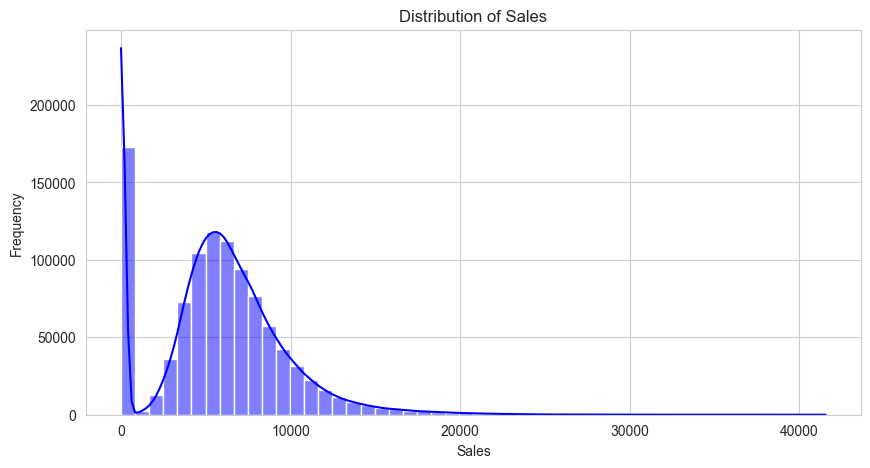

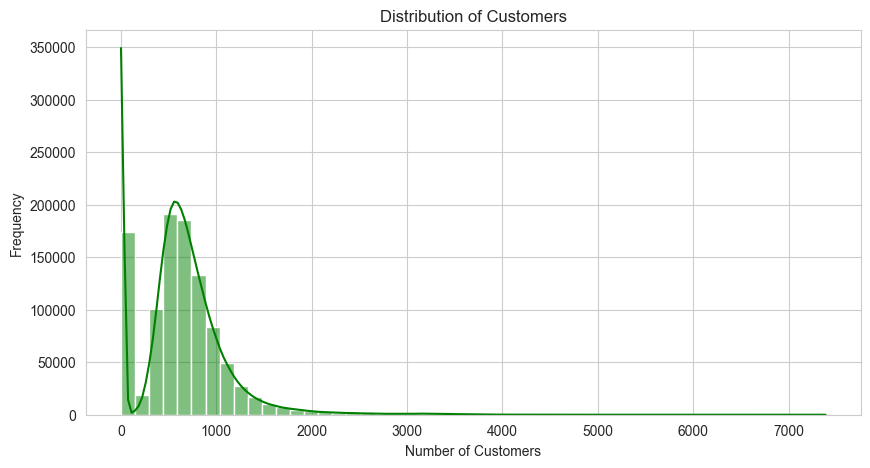

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set_style("whitegrid")

# Plot sales distribution
plt.figure(figsize=(10, 5))
sns.histplot(train_df["Sales"], bins=50, kde=True, color="blue")
plt.title("Distribution of Sales")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

# Plot number of customers distribution
plt.figure(figsize=(10, 5))
sns.histplot(train_df["Customers"], bins=50, kde=True, color="green")
plt.title("Distribution of Customers")
plt.xlabel("Number of Customers")
plt.ylabel("Frequency")
plt.show()


C:\Users\smrc\AppData\Local\Temp\ipykernel_7772\1271218871.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=holiday_sales.index, y=holiday_sales.values, palette="Blues_r")


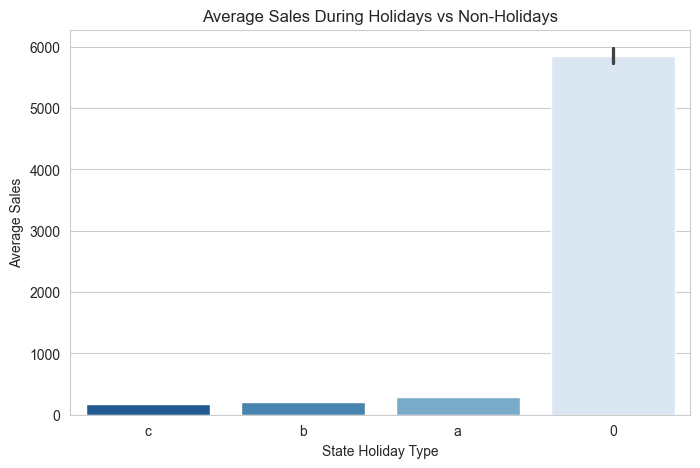

In [11]:
# Group by StateHoliday and calculate average sales
holiday_sales = train_df.groupby("StateHoliday")["Sales"].mean().sort_values()

# Plot sales before, during, and after holidays
plt.figure(figsize=(8, 5))
sns.barplot(x=holiday_sales.index, y=holiday_sales.values, palette="Blues_r")
plt.title("Average Sales During Holidays vs Non-Holidays")
plt.xlabel("State Holiday Type")
plt.ylabel("Average Sales")
plt.show()


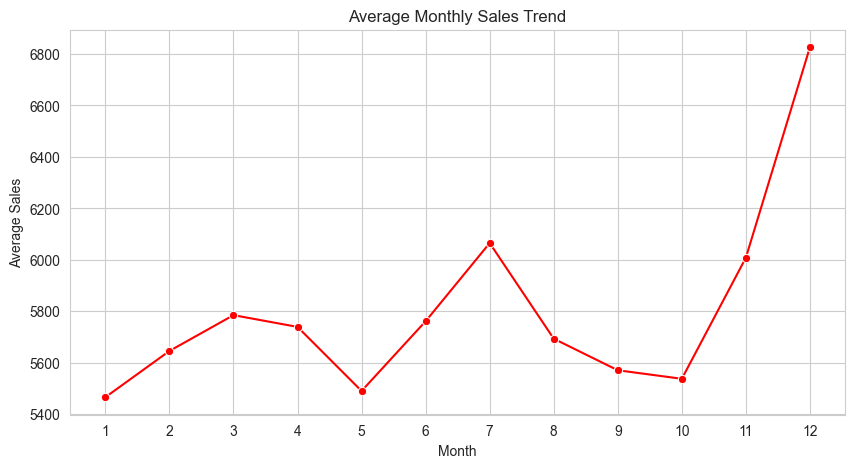

In [12]:
# Extract year and month for seasonal analysis
train_df["Year"] = train_df["Date"].dt.year
train_df["Month"] = train_df["Date"].dt.month

# Group by month and calculate average sales
monthly_sales = train_df.groupby("Month")["Sales"].mean()

# Plot seasonal trends
plt.figure(figsize=(10, 5))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker="o", color="red")
plt.xticks(range(1, 13))
plt.title("Average Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Average Sales")
plt.grid(True)
plt.show()
